In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
pd.__version__

'1.2.4'

In [22]:
np.__version__

'1.19.5'

# Transformação dos Dados

In [23]:
#importando dados do sudeste
data_doc = pd.read_csv("DADOS/docentes_sudeste.csv", sep="|", nrows=100000)

In [24]:
#a primeira linha abaixo faz com que todas as colunas sejam mostradas, e a segunda apresenta as primeiras 5 linhas

pd.set_option("display.max_columns", None)
data_doc.head(5)

,NU_ANO_CENSO,ID_DOCENTE,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,TP_ESCOLARIDADE,TP_ENSINO_MEDIO,TP_SITUACAO_CURSO_1,CO_AREA_CURSO_1,CO_CURSO_1,IN_LICENCIATURA_1,NU_ANO_CONCLUSAO_1,TP_TIPO_IES_1,CO_IES_1,TP_SITUACAO_CURSO_2,CO_AREA_CURSO_2,CO_CURSO_2,IN_LICENCIATURA_2,NU_ANO_CONCLUSAO_2,TP_TIPO_IES_2,CO_IES_2,TP_SITUACAO_CURSO_3,CO_AREA_CURSO_3,CO_CURSO_3,IN_LICENCIATURA_3,NU_ANO_CONCLUSAO_3,TP_TIPO_IES_3,CO_IES_3,IN_COMPLEMENTACAO_PEDAGOGICA,CO_AREA_COMPL_PEDAGOGICA_1,CO_AREA_COMPL_PEDAGOGICA_2,CO_AREA_COMPL_PEDAGOGICA_3,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,IN_POS_NENHUM,IN_ESPECIFICO_CRECHE,IN_ESPECIFICO_PRE_ESCOLA,IN_ESPECIFICO_ANOS_INICIAIS,IN_ESPECIFICO_ANOS_FINAIS,IN_ESPECIFICO_ENS_MEDIO,IN_ESPECIFICO_EJA,IN_ESPECIFICO_ED_ESPECIAL,IN_ESPECIFICO_ED_INDIGENA,IN_ESPECIFICO_CAMPO,IN_ESPECIFICO_AMBIENTAL,IN_ESPECIFICO_DIR_HUMANOS,IN_ESPECIFICO_DIV_SEXUAL,IN_ESPECIFICO_DIR_ADOLESC,IN_ESPECIFICO_AFRO,IN_ESPECIFICO_GESTAO,IN_ESPECIFICO_OUTROS,IN_ESPECIFICO_NENHUM,ID_TURMA,TP_TIPO_DOCENTE,TP_TIPO_CONTRATACAO,IN_DISC_LINGUA_PORTUGUESA,IN_DISC_EDUCACAO_FISICA,IN_DISC_ARTES,IN_DISC_LINGUA_INGLES,IN_DISC_LINGUA_ESPANHOL,IN_DISC_LINGUA_FRANCES,IN_DISC_LINGUA_OUTRA,IN_DISC_LIBRAS,IN_DISC_LINGUA_INDIGENA,IN_DISC_PORT_SEGUNDA_LINGUA,IN_DISC_MATEMATICA,IN_DISC_CIENCIAS,IN_DISC_FISICA,IN_DISC_QUIMICA,IN_DISC_BIOLOGIA,IN_DISC_HISTORIA,IN_DISC_GEOGRAFIA,IN_DISC_SOCIOLOGIA,IN_DISC_FILOSOFIA,IN_DISC_ESTUDOS_SOCIAIS,IN_DISC_EST_SOCIAIS_SOCIOLOGIA,IN_DISC_INFORMATICA_COMPUTACAO,IN_DISC_ENSINO_RELIGIOSO,IN_DISC_PROFISSIONALIZANTE,IN_DISC_ESTAGIO_SUPERVISIONADO,IN_DISC_PEDAGOGICAS,IN_DISC_OUTRAS,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,TP_ETAPA_ENSINO,CO_CURSO_EDUC_PROFISSIONAL,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282104,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,25.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282105,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,26.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282106,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,N

In [25]:
#Escolhendo os dados que serão utilizados nos testes gerais

dados_1 = data_doc[['ID_DOCENTE','NU_MES','NU_ANO','NU_IDADE_REFERENCIA','TP_SEXO','TP_COR_RACA','IN_NECESSIDADE_ESPECIAL','IN_LICENCIATURA_1','IN_ESPECIALIZACAO','IN_MESTRADO','IN_DOUTORADO','IN_POS_NENHUM', 'IN_DISC_LINGUA_PORTUGUESA', 'IN_DISC_EDUCACAO_FISICA', 'IN_DISC_ARTES', 'IN_DISC_LINGUA_INGLES', 'IN_DISC_MATEMATICA', 'IN_DISC_CIENCIAS', 'IN_DISC_FISICA', 'IN_DISC_QUIMICA', 'IN_DISC_BIOLOGIA', 'IN_DISC_HISTORIA', 'IN_DISC_GEOGRAFIA', 'IN_DISC_SOCIOLOGIA', 'IN_DISC_FILOSOFIA']]

In [26]:
#Renomeando as colunas
dados_1 = dados_1.rename(columns={"NU_MES":"Mês Nasc.", "NU_ANO": "Ano Nasc.", "NU_IDADE_REFERENCIA":"Idade", "TP_SEXO":"Sexo", "TP_COR_RACA":"Etnia", "IN_NECESSIDADE_ESPECIAL": "Nec. Especial", "IN_LICENCIATURA_1":"Licenciatura", "IN_ESPECIALIZACAO":"Com espec.", "IN_MESTRADO":"Com mestrado", "IN_DOUTORADO":"Com doutorado", "IN_POS_NENHUM":"Sem pós", "IN_DISC_LINGUA_PORTUGUESA":"Língua Portuguesa", "IN_DISC_EDUCACAO_FISICA":"Ed. Física", "IN_DISC_ARTES":"Artes", "IN_DISC_LINGUA_INGLES":"Inglês", "IN_DISC_MATEMATICA":"Matemática", "IN_DISC_CIENCIAS":"Ciências", "IN_DISC_FISICA":"Física", "IN_DISC_QUIMICA":"Química", "IN_DISC_BIOLOGIA":"Biologia", "IN_DISC_HISTORIA":"História", "IN_DISC_GEOGRAFIA":"Geografia", "IN_DISC_SOCIOLOGIA":"Sociologia", "IN_DISC_FILOSOFIA":"Filosofia"})
dados_1

,ID_DOCENTE,Mês Nasc.,Ano Nasc.,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
0,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,057481E35BC8DBBDD5533A00BD4078CD,7,1986,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,057481E35BC8DBBDD5533A00BD4078CD,7,1986,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,057481E35BC8DBBDD5533A00BD4078CD,7,1986,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,057481E35BC8DBBDD5533A00BD4078CD,7,1986,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#Verificando os dados nulos

dados_1 = dados_1[dados_1.isnull().values.any(axis=1)]
NAvalues = dados_1.isnull().sum()

NAvaluesFrame = pd.DataFrame(NAvalues.sort_values(ascending = False), columns = ['NaN_Values'])

NAvaluesFrame

,NaN_Values
Ciências,44468
Sociologia,36123
Biologia,36123
Química,36123
Física,36123
Língua Portuguesa,16854
Ed. Física,16854
Geografia,16854
História,16854
Matemática,16854


In [28]:
#Dimensões do dataframe

print('Rows: {}\nColumns: {}'.format(dados_1.shape[0], dados_1.shape[1]))

Rows: 64478
Columns: 25


## Análises Estatísticas

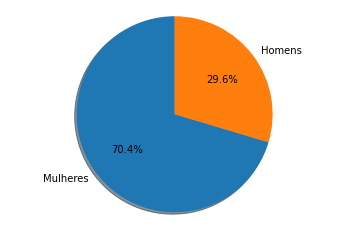

In [29]:
#plotando dados referentes a porcentagem de homens e mulheres docentes na região sudeste, para uma amostra 'x'

labels = 'Mulheres', 'Homens'
sizes = dados_1['Sexo'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

36    438
40    437
42    436
34    388
39    367
38    361
44    361
45    356
46    350
41    347
32    346
37    340
35    301
51    298
52    282
47    277
33    277
30    275
43    268
49    265
50    237
48    235
27    209
55    201
31    188
26    173
54    169
28    166
29    143
59    140
53    135
58    131
57    129
56    125
61    116
25    108
24     82
62     80
22     77
63     70
20     64
23     62
60     46
66     31
64     21
65     20
21     17
18     16
69     11
72      7
71      7
70      5
67      4
19      4
68      1
Name: Idade, dtype: int64

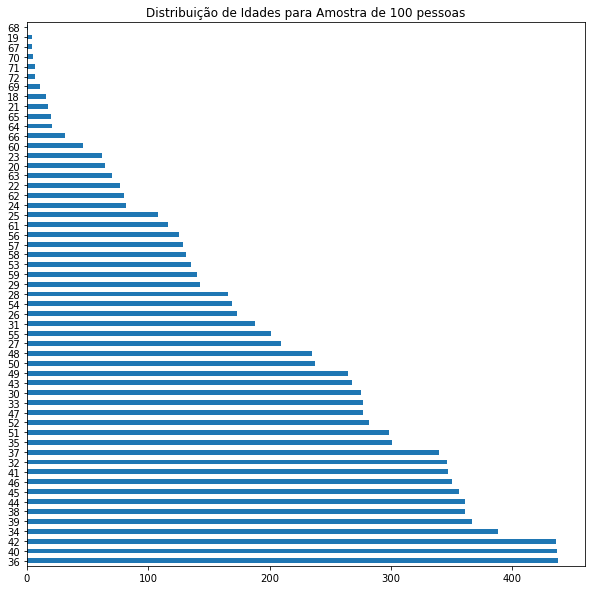

In [54]:
#Amostragem dos dados referente a idade dos professores

idades = dados_1['Idade'][:10000].value_counts().sort_values(ascending=False)

plt.figure(figsize = (10, 10))
idades.plot.barh()
plt.title("Distribuição de Idades para Amostra de 10000 indivíduos")

idades


Text(0.5, 1.0, 'Histograma de Idads para Amostra de 10000 indivíduos')

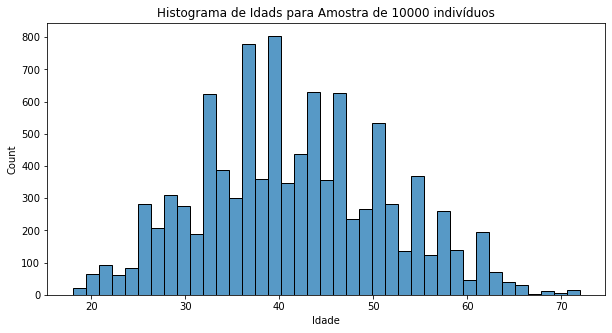

In [56]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dados_1['Idade'][:10000])
plt.title("Histograma de Idads para Amostra de 10000 indivíduos")

In [79]:
#Porcentagem de pessoas com e sem deficiência, para verificação de contagem

contagem_deficiencia = dados_1['Nec. Especial'].value_counts(normalize=True).sort_values(ascending=False)
print(round(contagem_deficiencia * 100, 2).to_frame())

   Nec. Especial
0          99.84
1           0.16


In [80]:
dados_1.columns[12:]

Index(['Língua Portuguesa', 'Ed. Física', 'Artes', 'Inglês', 'Matemática',
       'Ciências', 'Física', 'Química', 'Biologia', 'História', 'Geografia',
       'Sociologia', 'Filosofia'],
      dtype='object')

In [81]:
#Para este caso, queremos descobrir o número de professores que temos por matérias, portanto será usado um dataframe somente das matérias

# result = print(lambda x: x, dados_1.sum())

materias = pd.DataFrame(dados_1[['Língua Portuguesa', 'Ed. Física', 'Artes', 'Inglês', 'Matemática',
       'Ciências', 'Física', 'Química', 'Biologia', 'História', 'Geografia',
       'Sociologia', 'Filosofia']])

materias

,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#Os valores NaN, neste caso, podem ser substituídos por 0, para efeito de contagem e adequação da tabela

materias.fillna(0, inplace=True)
materias.isna().sum()

Língua Portuguesa    0
Ed. Física           0
Artes                0
Inglês               0
Matemática           0
Ciências             0
Física               0
Química              0
Biologia             0
História             0
Geografia            0
Sociologia           0
Filosofia            0
dtype: int64

[<function <lambda> at 0x0000024C4DAF9310>, Língua Portuguesa    8562.0
Ed. Física           7210.0
Artes                7621.0
Inglês               5109.0
Matemática           8157.0
Ciências             5588.0
Física               2197.0
Química              2269.0
Biologia             2443.0
História             7754.0
Geografia            7677.0
Sociologia           1884.0
Filosofia            2194.0
dtype: float64]


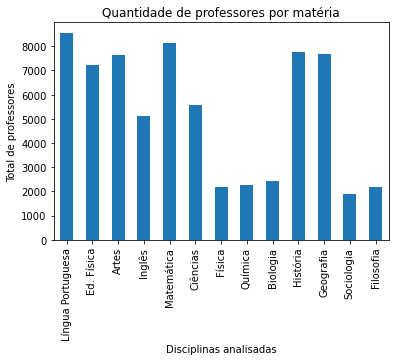

In [89]:
#Aqui verificamos o número de professores por disciplina, analisando se há discrepância no gráfico analisdo

soma_materias = lambda x: x, materias.sum()

materias.sum().plot.bar(title="Quantidade de professores por matéria")
plt.xlabel("Disciplinas analisadas")
plt.ylabel("Total de professores")

soma_materias = list(soma_materias)
df_sum_mat = pd.DataFrame(soma_materias, columns = ['Soma'])

print(soma_materias)

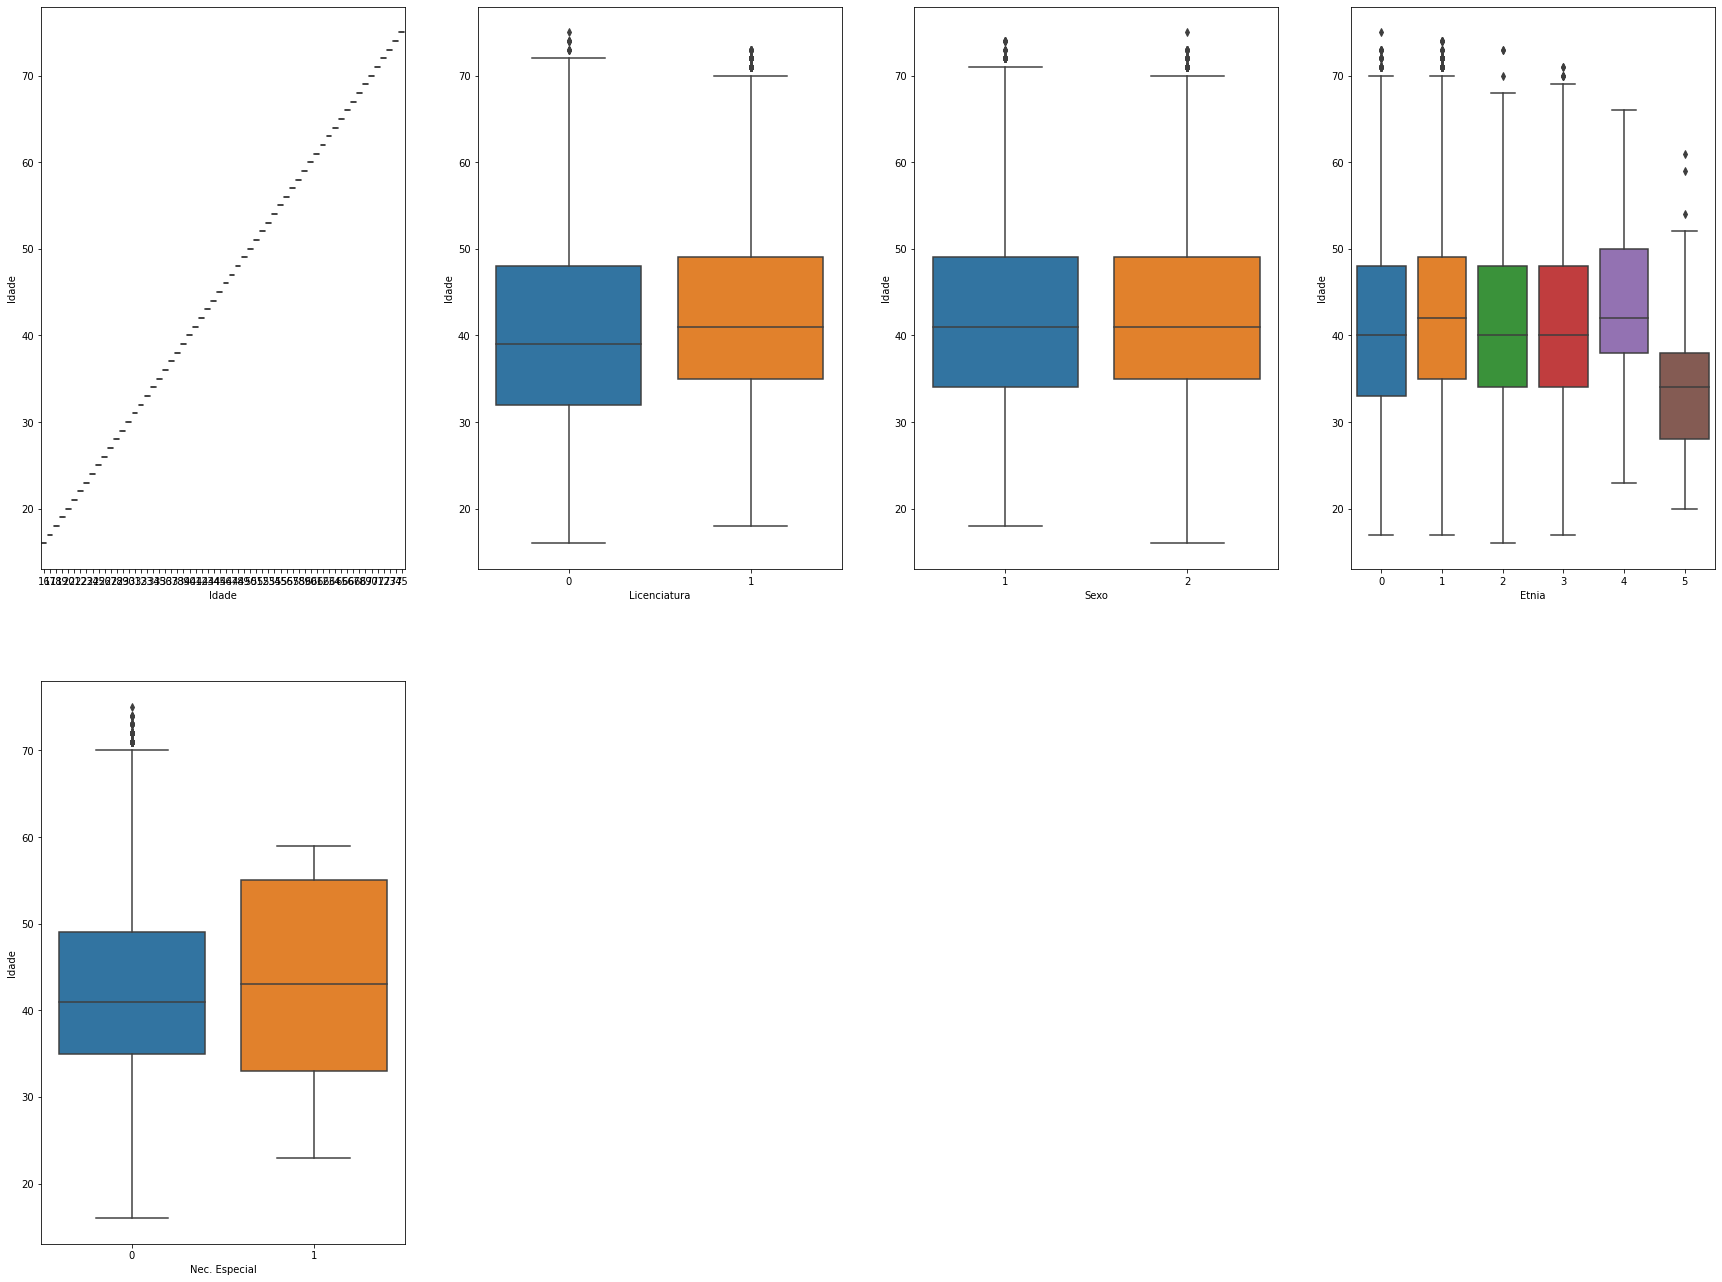

In [102]:
sub = dados_1[['Idade', 'Licenciatura', 'Sexo', 'Etnia', 'Nec. Especial']]

plt.figure(figsize = (30,60))
x = 1
for d in sub:
    plt.subplot(5, 4, x)
    sns.boxplot(data = aux, x = d, y = 'Idade')
    x += 1

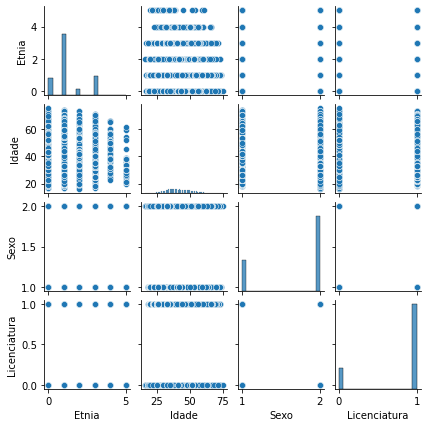

In [115]:
sns.pairplot(dados_1[['Etnia', 'Idade', 'Sexo', 'Licenciatura']], diag_kind="hist", height=1.5)

In [121]:
dados_1.drop(['Mês Nasc.', 'Ano Nasc.'], axis=1).describe()

,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
count,64478.000000,64478.000000,64478.000000,64478.000000,64478.000000,58123.000000,58123.000000,58123.000000,58123.000000,47624.000000,47624.000000,47624.000000,48850.000000,47624.000000,20010.000000,28355.000000,28355.000000,28355.000000,47624.000000,47624.000000,28355.000000,47624.000000
mean,41.908713,1.703775,1.272930,0.001566,0.799761,0.375531,0.054763,0.010289,0.578738,0.179783,0.151394,0.160024,0.104585,0.171279,0.279260,0.077482,0.080021,0.086158,0.162817,0.161200,0.066443,0.046069
std,10.033275,0.456595,0.968917,0.039547,0.400182,0.484264,0.227519,0.100910,0.493766,0.384011,0.358437,0.366632,0.306022,0.376757,0.448647,0.267359,0.271331,0.280602,0.369203,0.367719,0.249060,0.209637
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Analisando modelos para previsão de novos professores

In [123]:
# Previsão para o futuro
df1 = dados_1.copy().drop(['ID_DOCENTE', 'Mês Nasc.', 'Ano Nasc.'], axis=1)
df1 

,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
0,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,33,2,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Analisando com SVM

In [126]:
## teste para descobrir como se comporta o modelo de classificação aos dados do projeto

from sklearn import svm
from sklearn.model_selection import  train_test_split

In [128]:
data = df1[['Etnia', 'Nec. Especial', 'Idade', 'Sexo']]
target = df1['Licenciatura']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target


C:\Users\sergi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1000)

In [132]:
classifier = svm.SVC(C=1.0)

In [133]:
classifier.fit(x_train, y_train)

SVC()

In [134]:
# classifier.predict(x_test)

print(classifier.predict(data))

[1 1 1 ... 1 1 1]


In [135]:
print(classifier.predict(data).sum())

64478


In [140]:
classifier.score(data, target)

0.7997611588448773

In [137]:
df1['Licenciatura'].sum()

51567

In [138]:
#comparando com o valor real:

total_rows = df1['Licenciatura'].count()
print(total_rows)

64478


In [141]:
#teste com o decision tree regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

tester = DecisionTreeRegressor()
tester.fit(x_train, y_train)

predicao = tester.predict(x_test)

np.sqrt(mean_squared_error(y_test, predicao))

0.38164531224315584

In [142]:
tester.score(x_test, y_test)

0.0933870412254535

In [143]:
# plot_tree(tester)

In [144]:
#Usando randomforest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, criterion='gini')
clf.fit(x_train, y_train)

pred2 = clf.predict(x_test)

np.sqrt(mean_squared_error(y_test, pred2))

0.4344429706982056

In [145]:
clf.score(x_test, y_test)

0.8112593052109182

In [146]:
probabilidade = clf.predict_proba(data)[:,1]
classificacao = clf.predict(data)

df1['probabilidade'] = probabilidade
df1['classificacao'] = classificacao

df1[['Licenciatura', 'probabilidade', 'classificacao']]

,Licenciatura,probabilidade,classificacao
0,1,0.742191,1
1,1,0.742191,1
2,1,0.742191,1
3,1,0.742191,1
4,1,0.742191,1
...,...,...,...
99995,1,0.836335,1
99996,1,0.836335,1
99997,1,0.836335,1
99998,1,0.836335,1


In [148]:
#Verificando quantos professores, a partir do conjunto de dados, serão da matéria de matemática

data = df1[['Etnia', 'Nec. Especial', 'Idade', 'Sexo', 'Licenciatura']]
target = df1['Matemática']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target

C:\Users\sergi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 10)

In [150]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

pred3 = clf.predict(data)

np.sqrt(mean_squared_error(target, pred3))

0.3534272517732283

In [151]:
clf.score(data, target)

0.8750891777040231

In [152]:
pred3.sum()

331.0

In [153]:
probabilidade = clf.predict_proba(data)[:,1]
classificacao = clf.predict(data)

df1['probabilidade'] = probabilidade
df1['classificacao'] = classificacao

# pd.set_option("max_rows", None)
df1[['Matemática', 'probabilidade', 'classificacao']]

,Matemática,probabilidade,classificacao
0,1.0,0.069867,0.0
1,1.0,0.069867,0.0
2,1.0,0.069867,0.0
3,1.0,0.069867,0.0
4,1.0,0.069867,0.0
...,...,...,...
99995,0.0,0.115529,0.0
99996,0.0,0.115529,0.0
99997,0.0,0.115529,0.0
99998,0.0,0.115529,0.0


In [154]:
df1['classificacao'].sum()

331.0

In [155]:
#Verificando quantos professores, a partir do conjunto de dados, serão da matéria de língua portuguesa

data = df1[['Etnia', 'Nec. Especial', 'Idade', 'Sexo', 'Licenciatura']]
target = df1['Língua Portuguesa']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target

C:\Users\sergi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

clf = RandomForestClassifier(random_state=0, n_estimators=10000)
clf.fit(x_train, y_train)

pred3 = clf.predict(data)

np.sqrt(mean_squared_error(target, pred3))

0.36267511100509814

In [157]:
print(pred3.sum(), '|', clf.score(data, target), '|', np.unique(pred3, return_counts=True))

425.0 | 0.8684667638574397 | (array([0., 1.]), array([64053,   425], dtype=int64))


In [158]:
print((df1['Língua Portuguesa'].sum()/df1['Língua Portuguesa'].count())*100, '%')

13.278947858184187 %


In [159]:
probabilidade = clf.predict_proba(data)[:,1]
classificacao = clf.predict(data)

df1['probabilidade'] = probabilidade
df1['classificacao'] = classificacao

# pd.set_option("max_rows", None)
df1[['Língua Portuguesa', 'probabilidade', 'classificacao']]

,Língua Portuguesa,probabilidade,classificacao
0,0.0,0.047751,0.0
1,0.0,0.047751,0.0
2,0.0,0.047751,0.0
3,0.0,0.047751,0.0
4,0.0,0.047751,0.0
...,...,...,...
99995,0.0,0.110132,0.0
99996,0.0,0.110132,0.0
99997,0.0,0.110132,0.0
99998,0.0,0.110132,0.0


In [160]:
df1['Língua Portuguesa'].sum()

8562.0

In [161]:
df1['classificacao'].sum()

425.0